In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from pathlib import Path
import pandas as pd

In [2]:
#url = 'Resources/fma_3secs.csv'
orignial_df = pd.read_csv(Path('Resources/fma_3secs.csv'))
orignial_df

,filename,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,1-000574.mp3,0.381544,0.080175,0.249562,0.001513,1957.407156,39590.736312,2048.485350,25901.153997,3585.029860,...,30.766535,-8.990259,43.198818,1.595329,27.528227,-6.731744,34.697533,4.317326,35.314476,Rock
1,2-000574.mp3,0.436518,0.074070,0.263343,0.001272,1969.829480,75422.537033,2031.262553,55656.387528,3668.926532,...,34.857918,-7.328859,30.140669,0.171362,23.946671,-5.767624,31.231506,3.249825,28.855471,Rock
2,3-000574.mp3,0.484288,0.069135,0.253424,0.001391,2766.351306,309436.169216,2542.654962,168310.924937,5738.018893,...,25.085670,-7.587147,42.912727,0.172193,30.070772,-5.444875,14.732526,1.197923,23.562773,Rock
3,4-000574.mp3,0.425569,0.074970,0.256628,0.001596,2908.207536,157800.863917,2703.913526,39721.816727,6252.910907,...,21.063715,-8.594354,15.883783,-0.271126,27.283262,-5.592191,24.557570,-0.288590,14.412757,Rock
4,5-000574.mp3,0.468948,0.066816,0.265448,0.001309,2618.340173,129314.679539,2548.584807,34028.788419,5554.903846,...,23.539871,-9.315182,17.867613,-3.543423,15.073790,-5.760088,25.771444,2.120627,32.800819,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79935,6-155066.mp3,0.457243,0.066993,0.243057,0.000386,483.225740,45172.684403,875.708502,266648.246421,703.804462,...,44.069397,4.513030,35.256451,4.309551,25.806019,9.335838,30.525654,4.856527,22.975540,Hip-Hop
79936,7-155066.mp3,0.447897,0.071476,0.234766,0.000319,660.113748,112158.840869,1349.132689,567015.357017,775.692233,...,94.042519,1.916095,32.742737,2.931519,26.395258,7.093570,41.896832,5.723800,27.765524,Hip-Hop
79937,8-155066.mp3,0.444989,0.068753,0.230987,0.000125,631.195340,129673.607382,1317.927939,579189.561418,887.664889,...,42.242142,4.368050,34.333134,4.368290,35.798908,7.466063,37.081589,1.732873,36.141926,Hip-Hop
79938,9-155066.mp3,0.485998,0.070497,0.233158,0.000335,616.469137,113308.485962,1299.877639,574072.621801,730.638146,...,32.535034,1.273448,29.834116,4.322249,15.078435,9.085366,24.073069,6.584610,37.525909,Hip-Hop


In [3]:
#drop label and filename columns
X = orignial_df.drop(['label','filename'], axis=1)
# get label values 
y = orignial_df['label']
y.unique()

array(['Rock', 'Folk', 'Experimental', 'Hip-Hop', 'International', 'Pop',
       'Electronic', 'Instrumental'], dtype=object)

In [4]:
X = X[X.columns.drop(list(X.filter(regex='var')))]
X

,chroma_stft_mean,rms_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,harmony_mean,perceptr_mean,tempo,mfcc1_mean,...,mfcc11_mean,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean
0,0.381544,0.249562,1957.407156,2048.485350,3585.029860,0.100943,0.000052,0.000068,112.347147,-8.945985,...,3.019332,3.665317,-9.748421,2.995540,-4.559982,-2.866331,-8.990259,1.595329,-6.731744,4.317326
1,0.436518,0.263343,1969.829480,2031.262553,3668.926532,0.105416,0.000015,-0.000064,123.046875,7.491493,...,0.169190,4.600701,-7.535604,2.267977,-6.112905,-5.193264,-7.328859,0.171362,-5.767624,3.249825
2,0.484288,0.253424,2766.351306,2542.654962,5738.018893,0.158905,0.000034,-0.000009,117.453835,31.914341,...,-3.049455,2.144493,-9.148898,4.389838,-6.054724,-3.617906,-7.587147,0.172193,-5.444875,1.197923
3,0.425569,0.256628,2908.207536,2703.913526,6252.910907,0.163713,0.000011,-0.000250,117.453835,36.925098,...,-5.784952,3.680824,-10.186584,2.543274,-6.967072,-2.589857,-8.594354,-0.271126,-5.592191,-0.288590
4,0.468948,0.265448,2618.340173,2548.584807,5554.903846,0.139870,-0.000049,-0.000192,123.046875,37.924717,...,-8.235471,1.791170,-8.883386,-0.221089,-7.038162,-2.001146,-9.315182,-3.543423,-5.760088,2.120627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79935,0.457243,0.243057,483.225740,875.708502,703.804462,0.019449,0.000010,-0.000006,135.999178,-278.415741,...,-1.636234,6.133297,4.796370,2.530937,7.792923,14.952423,4.513030,4.309551,9.335838,4.856527
79936,0.447897,0.234766,660.113748,1349.132689,775.692233,0.019035,-0.000303,0.000336,135.999178,-273.169312,...,-3.726220,7.489089,2.066535,1.700049,2.323061,7.850317,1.916095,2.931519,7.093570,5.723800
79937,0.444989,0.230987,631.195340,1317.927939,887.664889,0.014461,0.000217,-0.000002,135.999178,-277.834869,...,-3.057849,6.231783,3.418291,4.423429,6.805921,10.383173,4.368050,4.368290,7.466063,1.732873
79938,0.485998,0.233158,616.469137,1299.877639,730.638146,0.018412,-0.000048,0.000080,135.999178,-284.960388,...,-3.458435,7.796859,3.189467,2.171970,2.082361,6.422930,1.273448,4.322249,9.085366,6.584610


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### with unscaled data

k: 1, Train/Test Score: 1.000/0.391
k: 3, Train/Test Score: 0.644/0.365
k: 5, Train/Test Score: 0.581/0.375
k: 7, Train/Test Score: 0.538/0.373
k: 9, Train/Test Score: 0.512/0.374
k: 11, Train/Test Score: 0.495/0.372
k: 13, Train/Test Score: 0.479/0.373
k: 15, Train/Test Score: 0.465/0.372
k: 17, Train/Test Score: 0.456/0.373
k: 19, Train/Test Score: 0.449/0.373


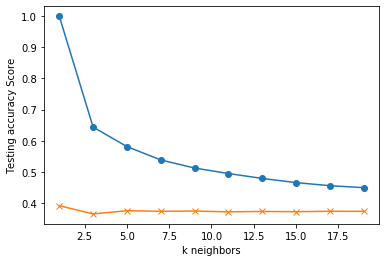

In [6]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

### with scaled data

In [7]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.853
k: 3, Train/Test Score: 0.919/0.811
k: 5, Train/Test Score: 0.881/0.786
k: 7, Train/Test Score: 0.851/0.764
k: 9, Train/Test Score: 0.824/0.739
k: 11, Train/Test Score: 0.800/0.718
k: 13, Train/Test Score: 0.778/0.698
k: 15, Train/Test Score: 0.757/0.680
k: 17, Train/Test Score: 0.739/0.663
k: 19, Train/Test Score: 0.722/0.651


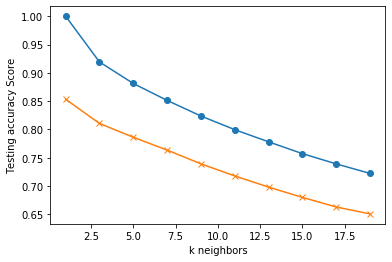

In [8]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [9]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
print('k=3 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=3 Test Acc: 0.811


In [10]:
predictions = knn.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
35901,International,International
41347,Experimental,Experimental
39425,Folk,Folk
58848,Rock,Rock
14569,Electronic,International
...,...,...
9492,Pop,Pop
67099,Rock,Rock
31822,Rock,Rock
26813,Rock,Rock
